In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# 确认device 以及 记录目录
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
logdir = '3d_pn_evaluate/'  # 存放log的目录
loglist = os.listdir(logdir)

# 初始化原始数据字典
element_dict = {'train_acc':[],'train_loss':[],'validate_acc':[],'validate_loss':[],'validate_miou':[]}
# rawdata = np.load()
for log in loglist:
    # 读入一个pth文件，包含了该part的所有指标
    rawdata = torch.load(logdir+log, map_location=device)
    # train_acc.append(rawdata['train_acc'])
    
    for element in rawdata:
        # 遍历获取所有指标的数据，并添加到此前定义的字典
        print('file %s'% log,'：ending performance of %s'% element ,'is: %f'% rawdata[element][-1])
        if element[-4:] == 'loss':
            # element_dict[element] = element_dict[element]
            renew = []
            for piece in rawdata[element]:
                renew.append(float(piece.detach().cpu().numpy()))
            element_dict[element].append(renew)
        else:

            element_dict[element].append(rawdata[element])
    print('----------------------end----------------------')
print('----------------over----------------')


file evaluation_data0.pth ：ending performance of train_acc is: 0.915429
file evaluation_data0.pth ：ending performance of train_loss is: 0.258198
file evaluation_data0.pth ：ending performance of validate_acc is: 0.878117
file evaluation_data0.pth ：ending performance of validate_loss is: 0.392752
file evaluation_data0.pth ：ending performance of validate_miou is: 0.555254
----------------------end----------------------
file evaluation_data1.pth ：ending performance of train_acc is: 0.914676
file evaluation_data1.pth ：ending performance of train_loss is: 0.256916
file evaluation_data1.pth ：ending performance of validate_acc is: 0.911558
file evaluation_data1.pth ：ending performance of validate_loss is: 0.262190
file evaluation_data1.pth ：ending performance of validate_miou is: 0.622699
----------------------end----------------------
file evaluation_data2.pth ：ending performance of train_acc is: 0.895236
file evaluation_data2.pth ：ending performance of train_loss is: 0.320853
file evaluation

In [3]:
# 初始化用于存储平均值的空字典
avg_element_dict = {'train_acc':np.zeros((50)),'train_loss':np.zeros((50)),'validate_acc':np.zeros((50)),'validate_loss':np.zeros((50)),'validate_miou':np.zeros((50))}
# print(element_dict)

for ele in element_dict:
    for data in element_dict[ele]:
        
        # if type(data[0]) == torch.Tensor:
        #     # 损失值需要由tensor转化为numpy
        #     print('no')
        #     renew = []
        #     for each in data:
        #         renew.append(each.detach().cpu().numpy())
        #     avg_element_dict[ele] += renew
        # else:
        avg_element_dict[ele] += data
    avg_element_dict[ele] /= len(element_dict[ele])
# print(avg_element_dict)

In [4]:
# 确认device 以及 记录目录
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
_logdir = '4d_pn_evaluate/'  # 存放log的目录
_loglist = os.listdir(_logdir)

# 初始化原始数据字典
_element_dict = {'train_acc':[],'train_loss':[],'validate_acc':[],'validate_loss':[],'validate_miou':[]}
# rawdata = np.load()
for log in _loglist:
    # 读入一个pth文件，包含了该part的所有指标
    rawdata = torch.load(_logdir+log, map_location=device)
    # train_acc.append(rawdata['train_acc'])
    
    for element in rawdata:
        # 遍历获取所有指标的数据，并添加到此前定义的字典
        print('file %s'% log,'：ending performance of %s'% element ,'is: %f'% rawdata[element][-1])
        if element[-4:] == 'loss':
            # _element_dict[element] = element_dict[element]
            _renew = []
            for piece in rawdata[element]:
                _renew.append(float(piece.detach().cpu().numpy()))
            _element_dict[element].append(_renew)
        else:

            _element_dict[element].append(rawdata[element])
        # print(_element_dict[element])
    print('----------------------end----------------------')

file evaluation_data0.pth ：ending performance of train_acc is: 0.852766
file evaluation_data0.pth ：ending performance of train_loss is: 0.457550
file evaluation_data0.pth ：ending performance of validate_acc is: 0.774714
file evaluation_data0.pth ：ending performance of validate_loss is: 0.774367
file evaluation_data0.pth ：ending performance of validate_miou is: 0.384175
----------------------end----------------------
file evaluation_data1.pth ：ending performance of train_acc is: 0.849139
file evaluation_data1.pth ：ending performance of train_loss is: 0.451994
file evaluation_data1.pth ：ending performance of validate_acc is: 0.858593
file evaluation_data1.pth ：ending performance of validate_loss is: 0.430864
file evaluation_data1.pth ：ending performance of validate_miou is: 0.483124
----------------------end----------------------
file evaluation_data2.pth ：ending performance of train_acc is: 0.909779
file evaluation_data2.pth ：ending performance of train_loss is: 0.275600
file evaluation

In [5]:
# 初始化用于存储平均值的空字典
_avg_element_dict = {'train_acc':np.zeros((50)),'train_loss':np.zeros((50)),'validate_acc':np.zeros((50)),'validate_loss':np.zeros((50)),'validate_miou':np.zeros((50))}


for ele in _element_dict:
    for data in _element_dict[ele]:
        
        # if type(data[0]) == torch.Tensor:
        #     # 损失值需要由tensor转化为numpy
        #     renew = []
        #     for each in data:
        #         renew.append(each.detach().cpu().numpy())
        #     _avg_element_dict[ele] += renew
        # else:
        _avg_element_dict[ele] += data
    _avg_element_dict[ele] /= len(_element_dict[ele])
# print(avg_element_dict)

In [6]:
# print(avg_element_dict)
# print(_avg_element_dict)

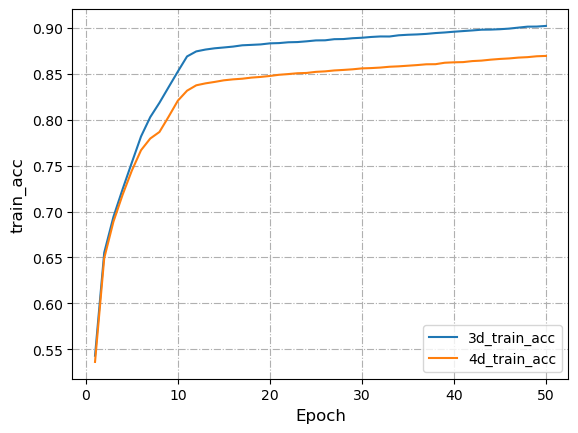

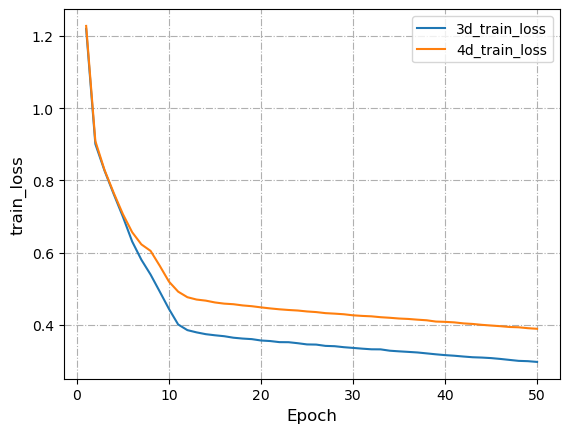

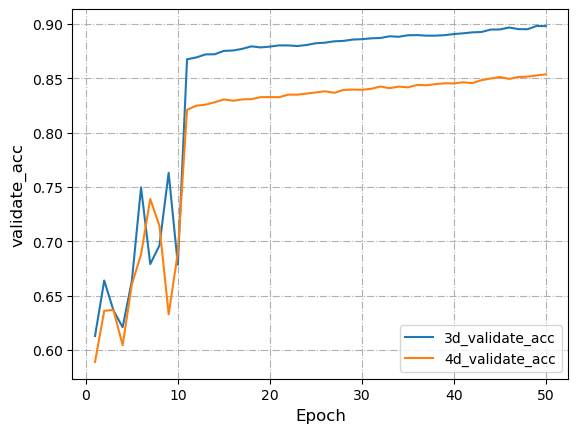

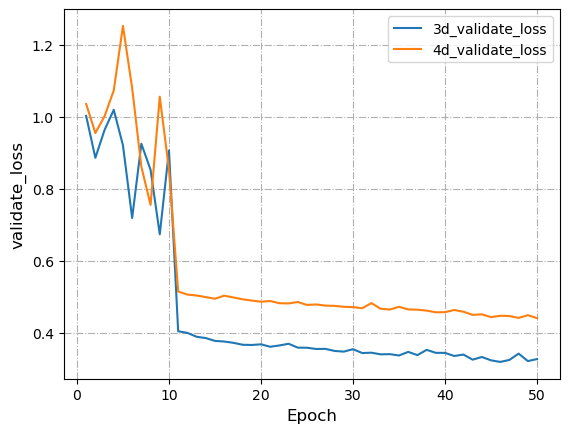

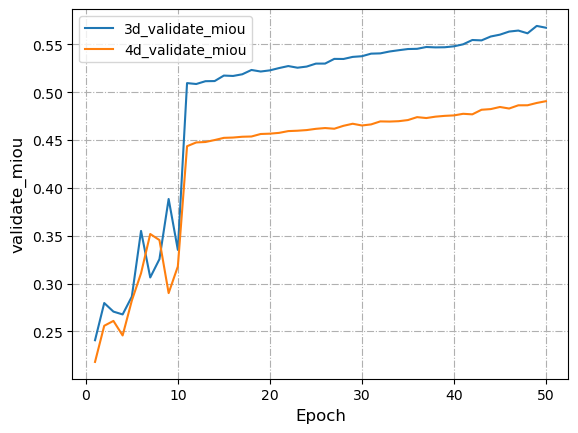

In [7]:
epoch = range(1, 51)
for ele in avg_element_dict:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)

    l, = plt.plot(epoch,avg_element_dict[ele])
    l2, = plt.plot(epoch,_avg_element_dict[ele])
    # 增加图例
    ax.legend(['3d_'+ele,'4d_'+ele],loc=0)
    # ax.legend(['4d_'+ele],loc=1)

    # 增加网格线
    ax.grid(linestyle='-.')

    # 坐标轴命名
    ax.set_xlabel('Epoch',size=12)
    ax.set_ylabel(ele,size=12)
    fig.savefig("avg_%s.jpg" % ele,dpi=500, bbox_inches='tight')

共记录的指标数：5
K折验证的K为：10
单次训练的epoch数：50


C:\Users\Admin\AppData\Local\Temp\ipykernel_21316\3771930835.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21316\3771930835.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


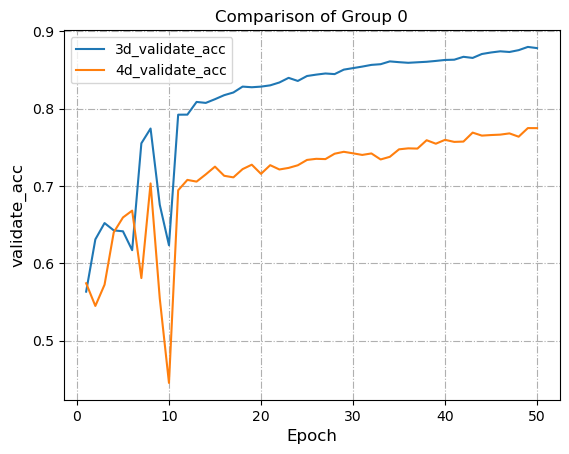

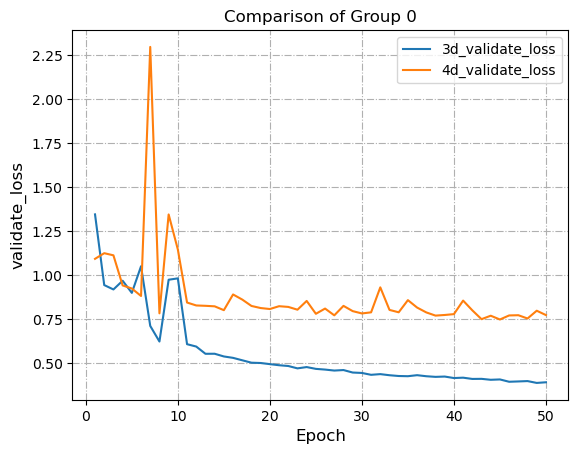

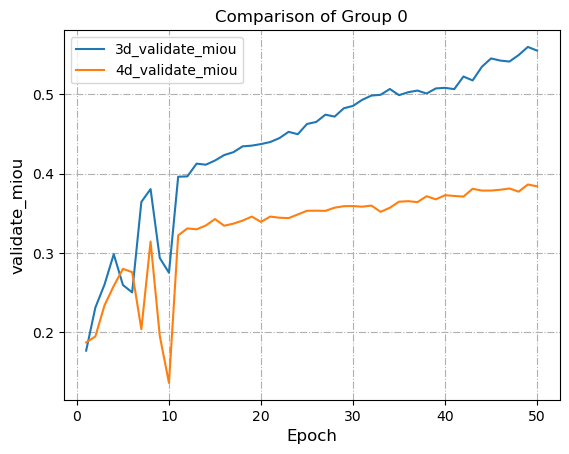

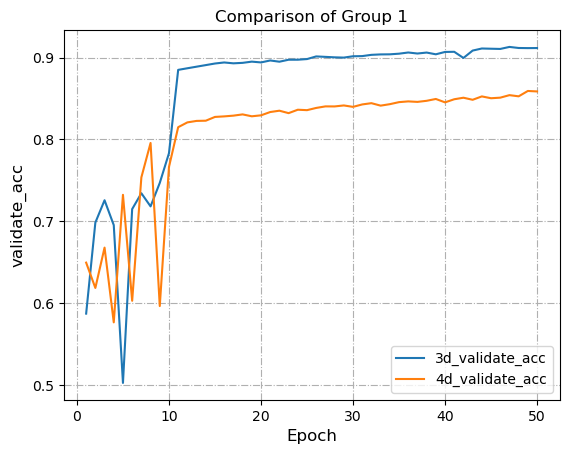

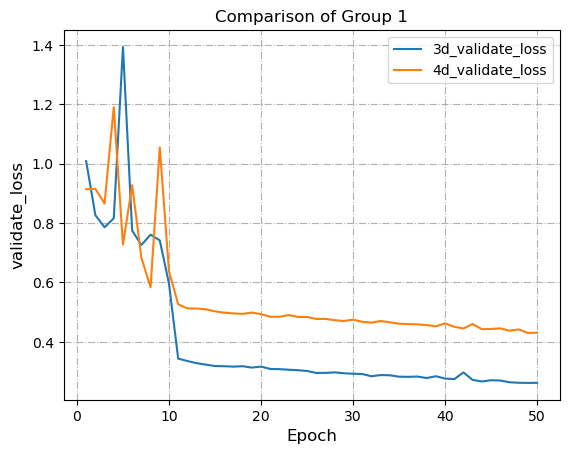

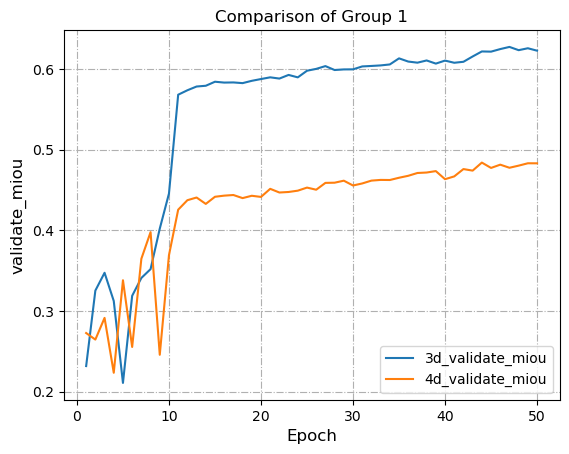

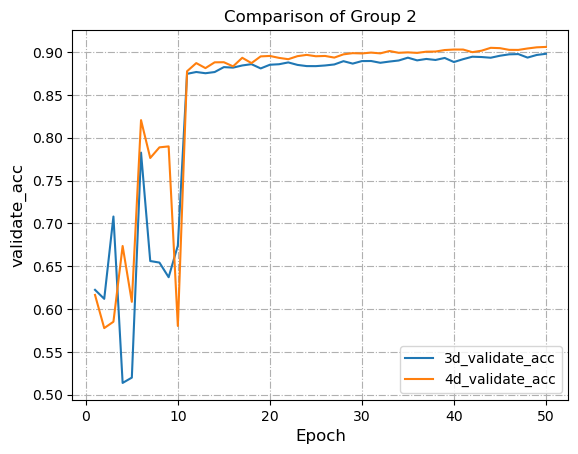

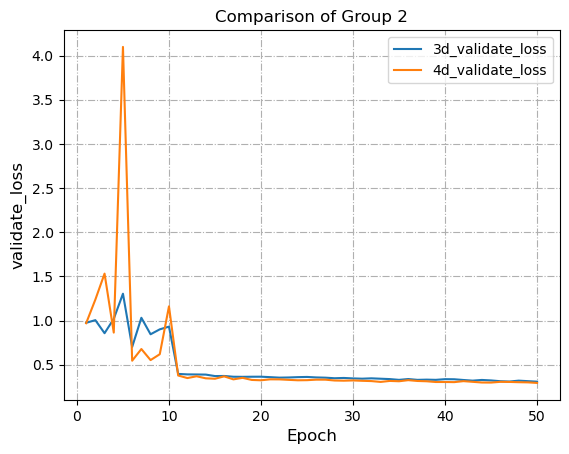

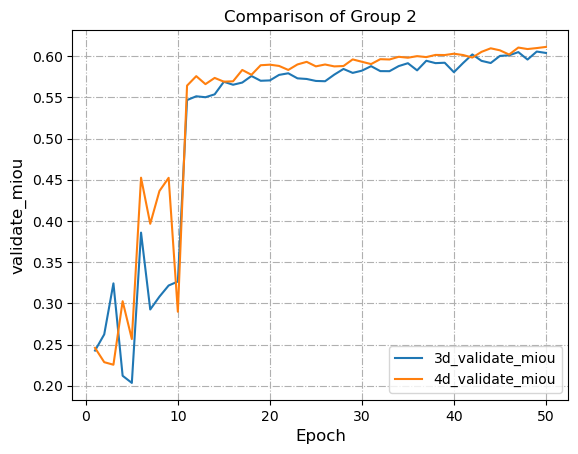

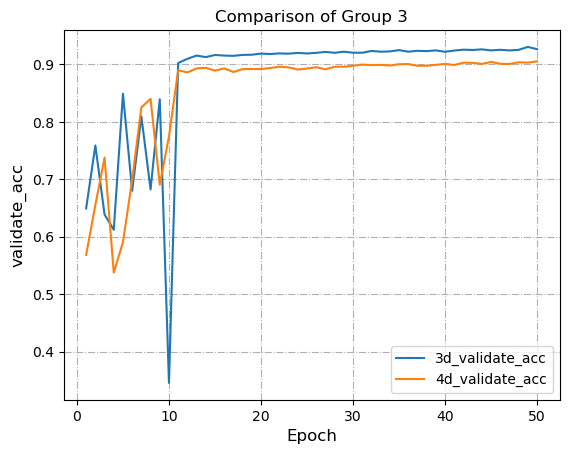

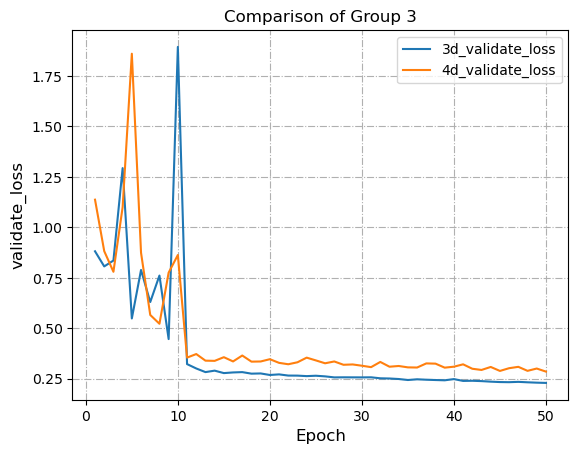

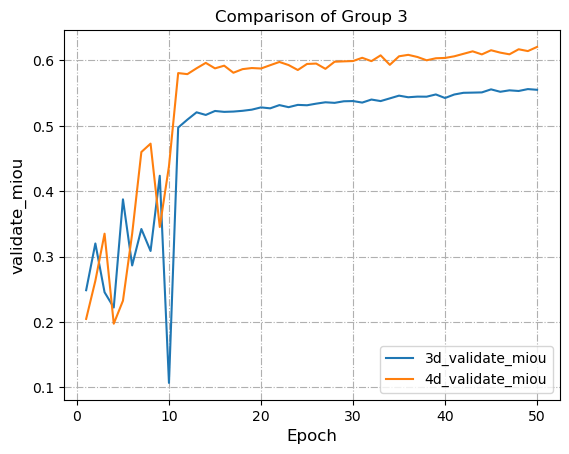

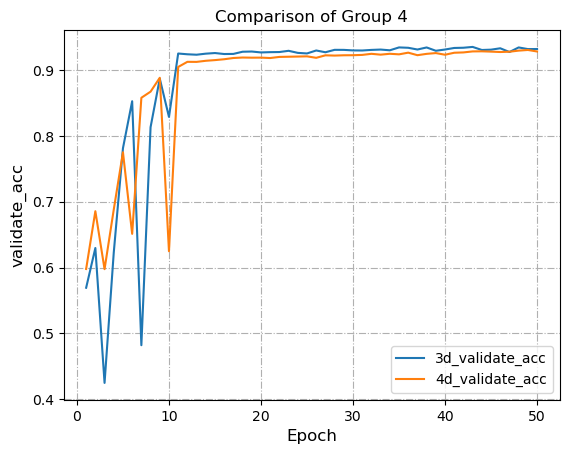

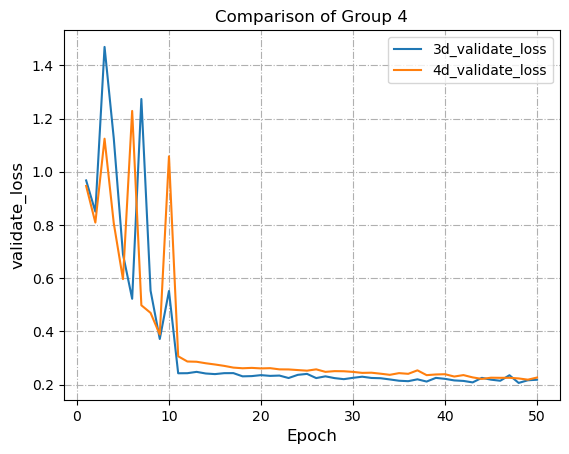

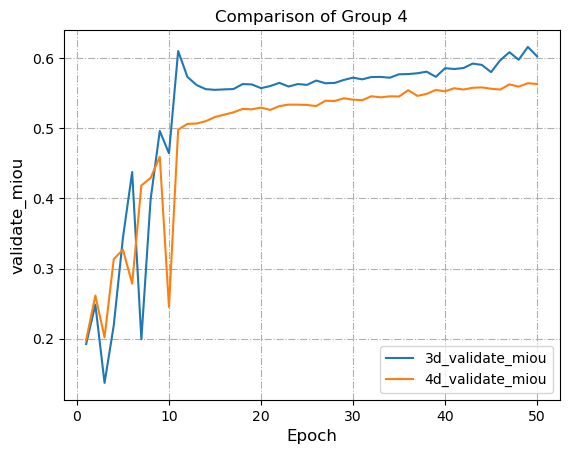

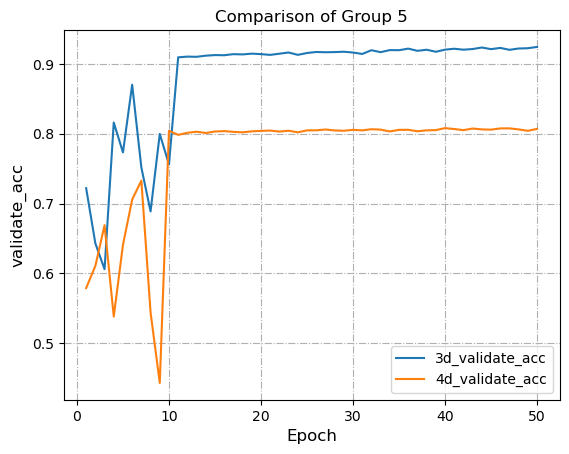

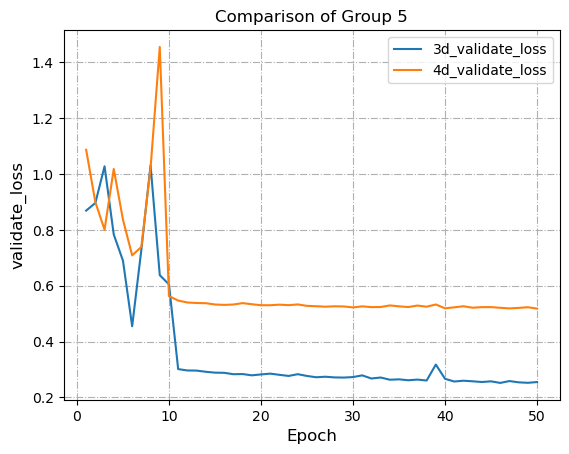

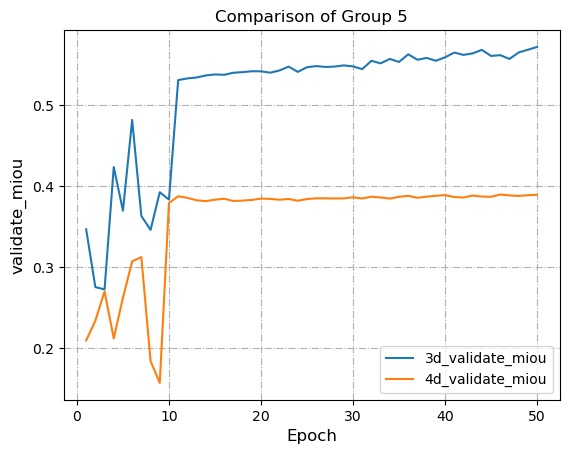

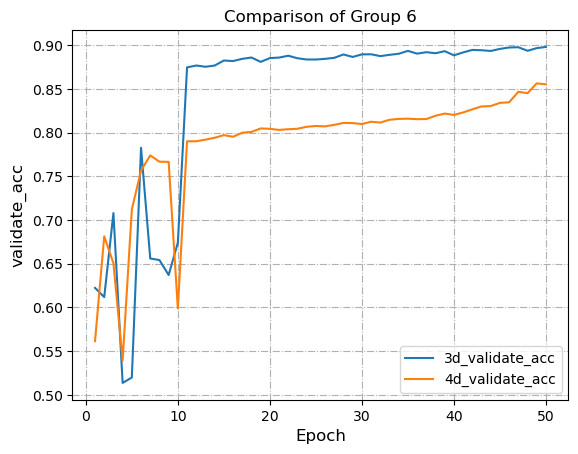

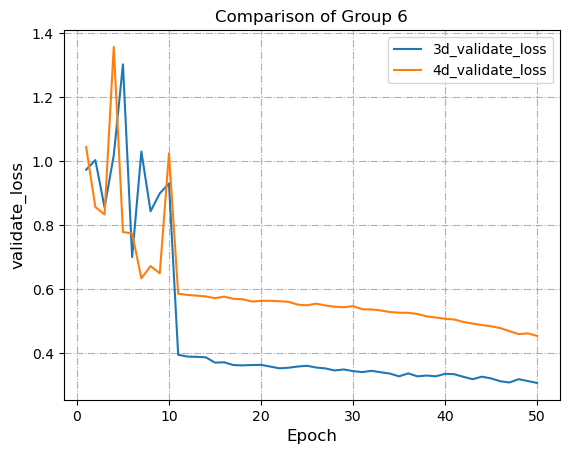

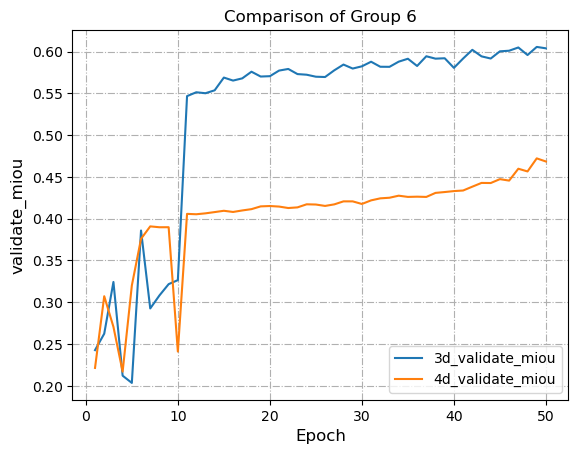

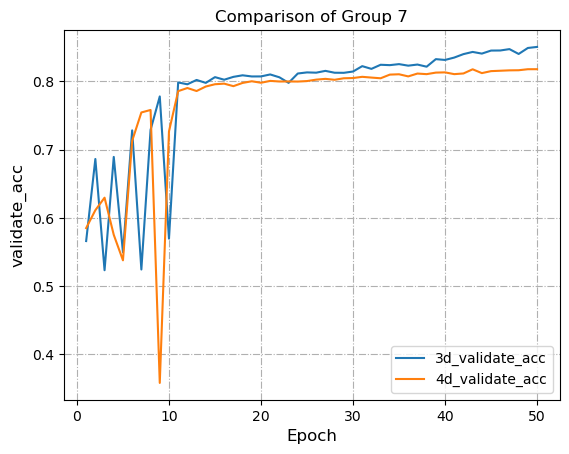

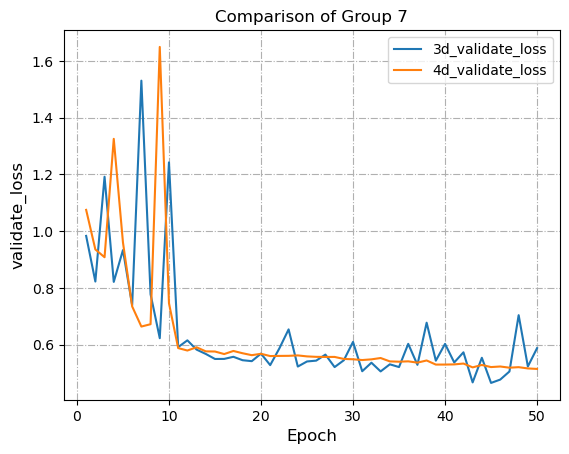

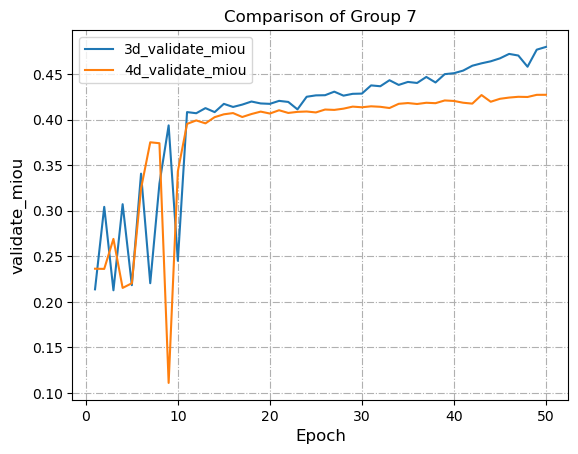

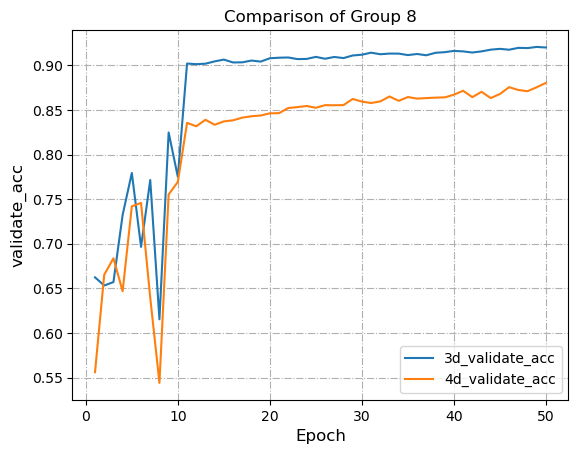

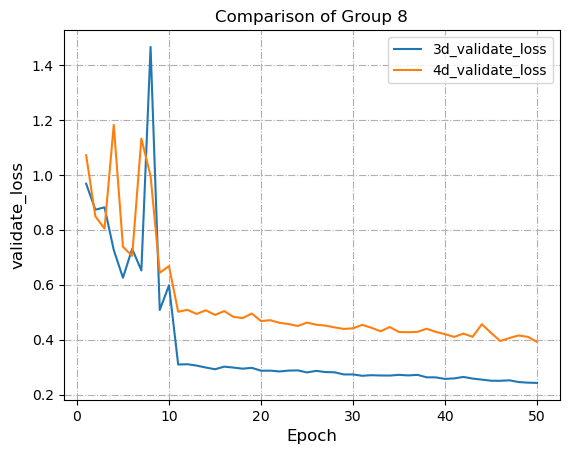

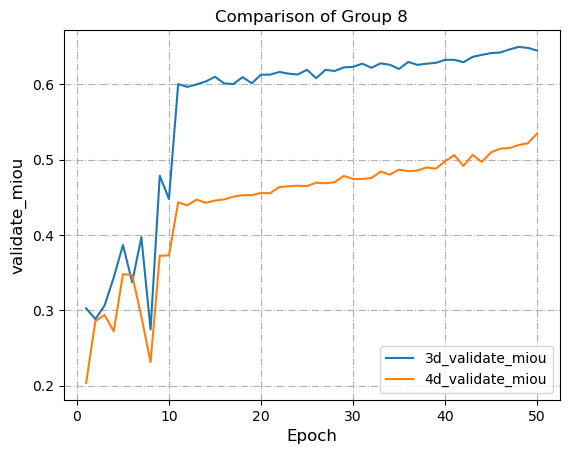

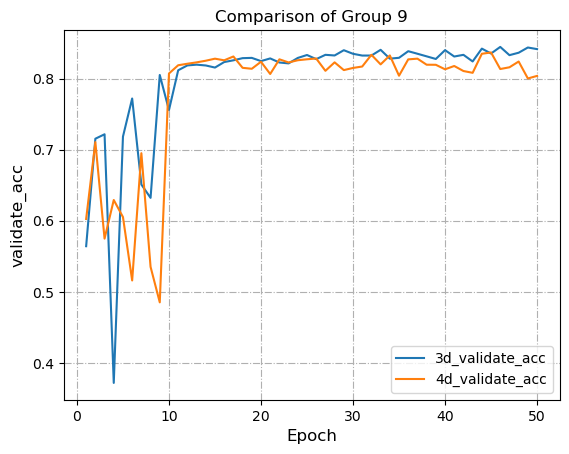

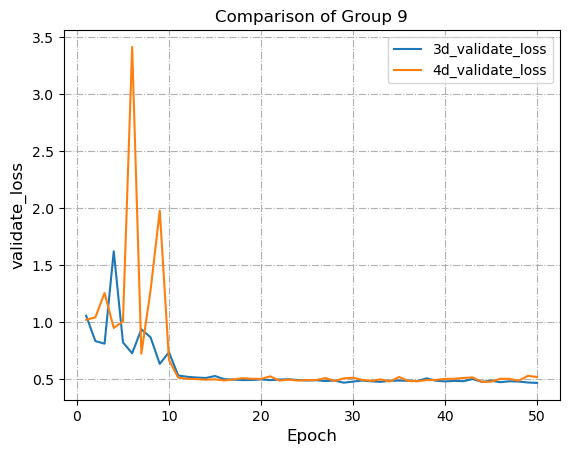

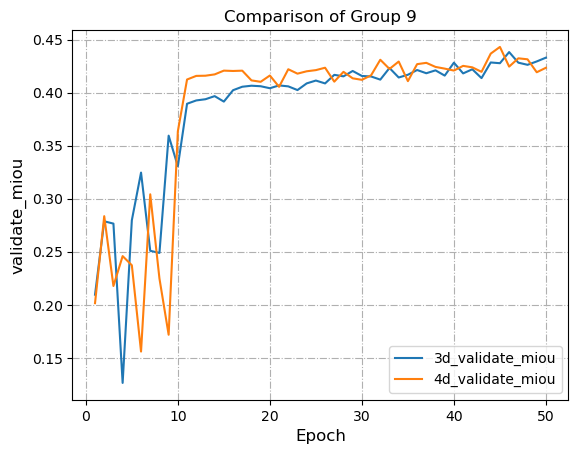

In [8]:

print('共记录的指标数：%i' % len(element_dict))  # 实验中需要记录的指标数
print('K折验证的K为：%i' % len(element_dict['train_acc']))  # 单次实验包含训练次数
print('单次训练的epoch数：%i' % len(element_dict['train_acc'][0]))  # 单次训练中的epoch数


epoch = range(1, 51)
for i in range(10):
    
    for ele in avg_element_dict:
        if ele[:3] == 'val':

            fig = plt.figure()
            title = plt.title('Comparison of Group %i' %i)
            ax = fig.add_subplot(111)
            # if ele == 'validate_loss':
            #     print('thats it')
            l, = plt.plot(epoch,element_dict[ele][i])
            l2, = plt.plot(epoch,_element_dict[ele][i])
            # 增加图例
            ax.legend(['3d_'+ele,'4d_'+ele],loc=0)
            # ax.legend(['4d_'+ele],loc=1)

            # 增加网格线
            ax.grid(linestyle='-.')

            # 坐标轴命名
            ax.set_xlabel('Epoch',size=12)
            ax.set_ylabel(ele,size=12)